In [1]:
import pyrqa
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/rqa_results-4.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'determinism', 'recurrence_rate', 'entropy',
       'longest_diagonal_line', 'average_diagonal_line', 'laminarity',
       'divergence', 'no_messages', 'diversity', 'diversity_bin', 'time',
       'high_performance', 'female_majority', 'revise_score', 'full_credit',
       'half_credit', 'task', 'task_numeric'],
      dtype='object')

In [4]:
data.drop(columns='Unnamed: 0', inplace=True)

In [5]:
data.head(10)

,determinism,recurrence_rate,entropy,longest_diagonal_line,average_diagonal_line,laminarity,divergence,no_messages,diversity,diversity_bin,time,high_performance,female_majority,revise_score,full_credit,half_credit,task,task_numeric
0,0.561449,0.266930,1.083095,8,2.630303,0.725369,0.125000,78,3,1,1169,0,1,0.0,0,0,Professor,0
1,0.407480,0.215632,0.768094,8,2.435294,0.681693,0.125000,71,2,0,731,0,1,0.0,0,0,Professor,0
2,0.276596,0.202938,0.655482,3,2.363636,0.538462,0.333333,33,3,1,684,0,0,0.0,0,0,Professor,0
3,0.455988,0.208333,0.711437,6,2.323529,0.604082,0.166667,84,4,1,1699,0,0,0.0,0,0,Professor,0
4,0.467005,0.207940,0.755876,4,2.358974,0.663636,0.250000,46,1,0,869,0,1,0.0,0,0,Professor,0
5,0.589666,0.290905,1.185261,9,2.771429,0.754513,0.111111,69,3,1,1295,0,1,0.0,0,0,Professor,0
6,0.612751,0.284089,1.352437,11,3.052941,0.811619,0.090909,79,4,1,856,1,0,2.0,1,1,Professor,0
7,0.470994,0.270756,0.992356,6,2.544776,0.615233,0.166667,75,3,1,752,0,1,0.0,0,0,Professor,0
8,0.422727,0.183642,0.685185,7,2.325000,0.620798,0.142857,72,2,0,1452,0,1,0.5,0,0,Professor,0
9,0.622807,0.290352,1.139996,8,2.704762,0.816273,0.125000,81,2,0,742,1,1,2.0,1,1,Professor,0


In [6]:
measures = list(data.columns[:-2])
measures.append('task_numeric')

In [7]:
measures

['determinism',
 'recurrence_rate',
 'entropy',
 'longest_diagonal_line',
 'average_diagonal_line',
 'laminarity',
 'divergence',
 'no_messages',
 'diversity',
 'diversity_bin',
 'time',
 'high_performance',
 'female_majority',
 'revise_score',
 'full_credit',
 'half_credit',
 'task_numeric']

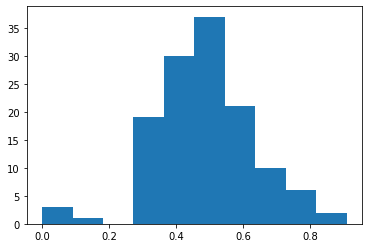

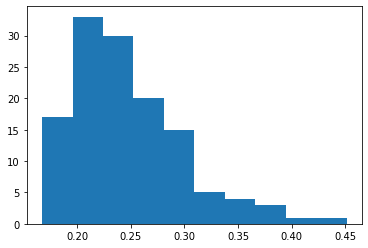

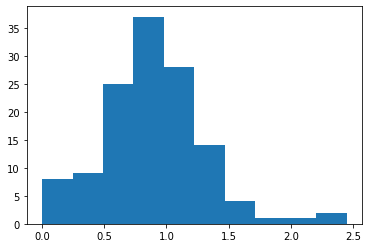

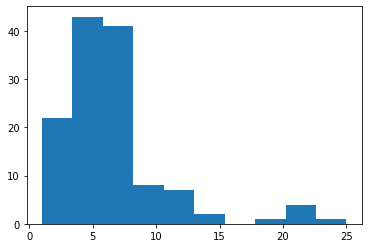

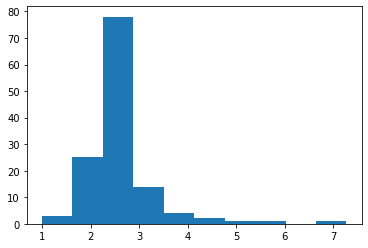

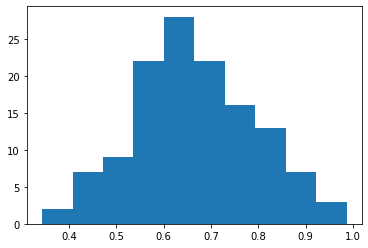

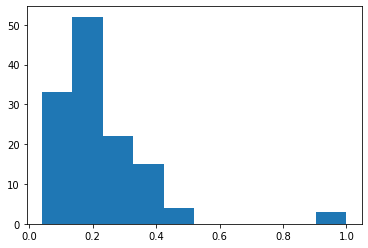

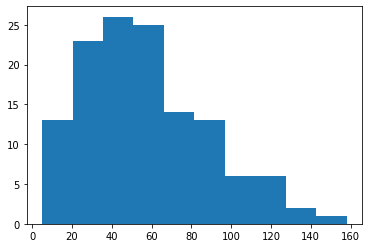

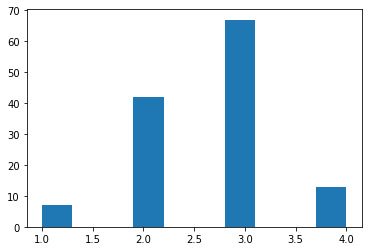

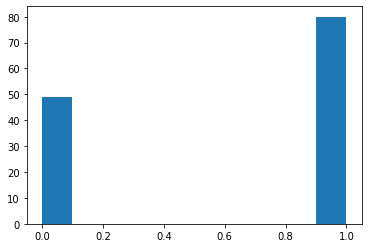

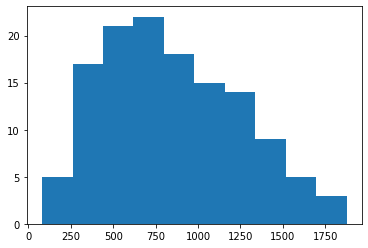

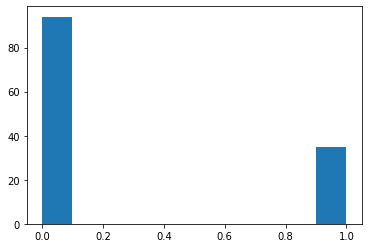

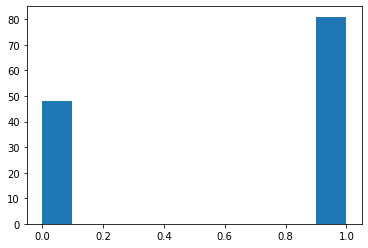

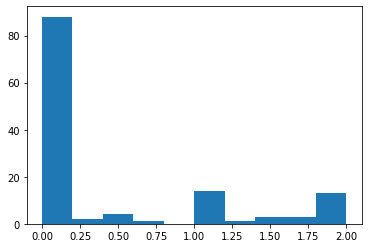

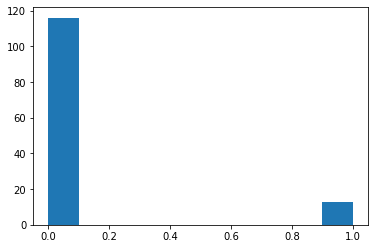

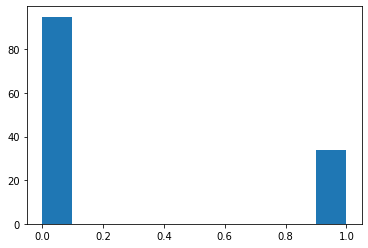

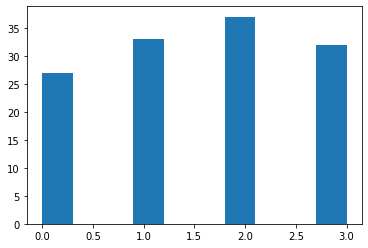

In [16]:
for i in measures:
    plt.hist(data[i])
    plt.show()

In [ ]:


# subsetting the data:
ctrl = df.query('group == "ctrl"')['weight']
trt1 = df.query('group == "trt1"')['weight']
trt2 = df.query('group == "trt2"')['weight']

# Bartlett's test in Python with SciPy:
stat, p = bartlett(ctrl, trt1, trt2)

# Get the results:
print(stat, p)


In [6]:
from scipy.stats import bartlett

var_hom = []
for i in ['entropy', 'longest_diagonal_line', 'average_diagonal_line', 'no_messages', 'time']:
    div_dif = data.groupby(['diversity'])[i].apply(list)
    var_hom.append(bartlett(div_dif[1], div_dif[2], div_dif[3], div_dif[4]).pvalue)
    
var_hom

[0.025166009417112604,
 0.0006985153567316323,
 2.220649014059306e-12,
 0.08804800631645968,
 0.07159924676938839]

In [7]:
from scipy.stats import levene

var_hom = []
for i in ['entropy', 'longest_diagonal_line', 'average_diagonal_line', 'no_messages', 'time']:
    div_dif = data.groupby(['diversity'])[i].apply(list)
    var_hom.append(levene(div_dif[1], div_dif[2], div_dif[3], div_dif[4]).pvalue)
    
var_hom

[0.3015353319769836,
 0.0520969525264335,
 0.03999761145122751,
 0.22579832080300594,
 0.053215663901267724]

In [10]:
results = []
feature_anova = dict()
for i in measures:
    task_dif = data.groupby(['task'])[i].apply(list)
    results.append(scipy.stats.f_oneway(task_dif['PartyVenue'], task_dif['Professor'], 
                                                  task_dif['apartment'], task_dif['candidate']).pvalue)
feature_anova['task'] = results

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


In [11]:
results = []
for i in measures:
    div_dif = data.groupby(['diversity'])[i].apply(list)
    results.append(scipy.stats.f_oneway(div_dif[1], div_dif[2], div_dif[3], div_dif[4]).pvalue)
    
feature_anova['diversity'] = results

In [12]:
data.groupby(['diversity'])[measures].mean()

,determinism,recurrence_rate,entropy,longest_diagonal_line,average_diagonal_line,laminarity,divergence,no_messages,diversity,diversity_bin,time,high_performance,female_majority,revise_score,full_credit,half_credit,task_numeric
diversity,,,,,,,,,,,,,,,,,
1,0.511155,0.237073,0.951707,6.285714,2.890521,0.707824,0.215873,39.857143,1.0,0.0,715.142857,0.142857,0.857143,0.214286,0.000000,0.142857,1.571429
2,0.494225,0.247301,0.916197,6.404762,2.715159,0.665768,0.218953,49.952381,2.0,0.0,727.333333,0.214286,0.714286,0.398810,0.142857,0.214286,1.428571
3,0.457867,0.246622,0.808399,5.611940,2.431903,0.651347,0.232687,59.238806,3.0,1.0,885.417910,0.313433,0.582090,0.427239,0.059701,0.298507,1.686567
4,0.553246,0.249789,1.217135,11.230769,3.190513,0.718667,0.113992,77.461538,4.0,1.0,1141.000000,0.307692,0.461538,0.586538,0.230769,0.307692,1.461538


In [13]:
results = []
for i in measures:
    fm_dif = data.groupby(['female_majority'])[i].apply(list)
    results.append(scipy.stats.f_oneway(fm_dif[0], fm_dif[1]).pvalue)
    
feature_anova['female_majority'] = results

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


In [14]:
feature_anova

{'task': [0.4140064409416647,
  0.23655114124622129,
  0.11021516969209363,
  0.4419534485201636,
  0.15034631187219255,
  0.23067887028412323,
  0.42699244288734184,
  0.6488659776833008,
  0.9623544034803543,
  0.6642659650094789,
  0.32306526044125283,
  0.0018506016001086957,
  0.22140309840385092,
  0.001334177355695501,
  0.06484052761707572,
  0.003401818262476812,
  0.0],
 'diversity': [0.1460344432437984,
  0.9635483603427722,
  0.015194398160446668,
  0.0001294437383426068,
  0.002523094689713751,
  0.28493935106732543,
  0.08586128742479177,
  0.0185505693872811,
  0.0,
  0.0,
  0.006921479919086446,
  0.5881749572931187,
  0.17038005241636953,
  0.7110859981679811,
  0.15494941148270125,
  0.6664209980050092,
  0.6580109540866629],
 'female_majority': [0.7149185430682055,
  0.24801271768689662,
  0.6688686766594323,
  0.48366578043902,
  0.9856444368987245,
  0.20015128554692901,
  0.7335573389218166,
  0.1812919575087236,
  0.024617430960095606,
  0.0500603692189969,
  0.1

In [15]:
results = []
for i in measures:
    perf_dif = data.groupby(['high_performance'])[i].apply(list)
    results.append(scipy.stats.f_oneway(perf_dif[0], perf_dif[1]).pvalue)
    
feature_anova['high_performance'] = results

In [16]:
results = []
for i in measures:
    divbin_dif = data.groupby(['diversity_bin'])[i].apply(list)
    results.append(scipy.stats.f_oneway(divbin_dif[0], divbin_dif[1]).pvalue)
    
feature_anova['diversity_bin'] = results

In [17]:
feature_anova

{'task': [0.4140064409416647,
  0.23655114124622129,
  0.11021516969209363,
  0.4419534485201636,
  0.15034631187219255,
  0.23067887028412323,
  0.42699244288734184,
  0.6488659776833008,
  0.9623544034803543,
  0.6642659650094789,
  0.32306526044125283,
  0.0018506016001086957,
  0.22140309840385092,
  0.001334177355695501,
  0.06484052761707572,
  0.003401818262476812,
  0.0],
 'diversity': [0.1460344432437984,
  0.9635483603427722,
  0.015194398160446668,
  0.0001294437383426068,
  0.002523094689713751,
  0.28493935106732543,
  0.08586128742479177,
  0.0185505693872811,
  0.0,
  0.0,
  0.006921479919086446,
  0.5881749572931187,
  0.17038005241636953,
  0.7110859981679811,
  0.15494941148270125,
  0.6664209980050092,
  0.6580109540866629],
 'female_majority': [0.7149185430682055,
  0.24801271768689662,
  0.6688686766594323,
  0.48366578043902,
  0.9856444368987245,
  0.20015128554692901,
  0.7335573389218166,
  0.1812919575087236,
  0.024617430960095606,
  0.0500603692189969,
  0.1

In [18]:
anova_results = pd.DataFrame(feature_anova).transpose()
anova_results.columns = measures

In [19]:
anova_results
anova_results.style.apply(lambda x: ["background: yellow" if v <= 0.05 else "" for v in x], axis = 1)

,determinism,recurrence_rate,entropy,longest_diagonal_line,average_diagonal_line,laminarity,divergence,no_messages,diversity,diversity_bin,time,high_performance,female_majority,revise_score,full_credit,half_credit,task_numeric
task,0.414006,0.236551,0.110215,0.441953,0.150346,0.230679,0.426992,0.648866,0.962354,0.664266,0.323065,0.001851,0.221403,0.001334,0.064841,0.003402,0.000000
diversity,0.146034,0.963548,0.015194,0.000129,0.002523,0.284939,0.085861,0.018551,0.000000,0.000000,0.006921,0.588175,0.170380,0.711086,0.154949,0.666421,0.658011
female_majority,0.714919,0.248013,0.668869,0.483666,0.985644,0.200151,0.733557,0.181292,0.024617,0.050060,0.133328,0.422013,0.000000,0.384022,0.193504,0.335330,0.670973
high_performance,0.221933,0.007199,0.137403,0.499779,0.730242,0.799658,0.296169,0.005485,0.208334,0.181631,0.006860,0.000000,0.422013,0.000000,0.000000,0.000000,0.844415
diversity_bin,0.387213,0.892270,0.553937,0.858495,0.167333,0.685132,0.855008,0.017078,0.000000,0.000000,0.005784,0.181631,0.050060,0.525582,0.525909,0.233333,0.307131


In [20]:
anova_results.to_csv('./data/anova_res.csv')

In [21]:
data.groupby(['female_majority', 'diversity_bin'])[measures].mean()

determinism  recurrence_rate   entropy  \
female_majority diversity_bin                                           
0               0                 0.478789         0.251583  0.921756   
                1                 0.474966         0.254346  0.910616   
1               0                 0.503091         0.243766  0.921094   
                1                 0.472123         0.241529  0.846977   

                               longest_diagonal_line  average_diagonal_line  \
female_majority diversity_bin                                                 
0               0                           5.846154               2.589757   
                1                           7.171429               2.640815   
1               0                           6.583333               2.794541   
                1                           6.022222               2.488569   

                               laminarity  divergence  no_messages  diversity  \
female_majority diversity_bin                                                   
0               0                0.616782    0.251437    46.384615   1.923077   
                1                0.658283    0.210170    67.628571   3.200000   
1               0                0.691635    0.206624    49.277778   1.833333   
                1                0.665401    0.215910    57.977778   3.133333   

                               diversity_bin         time  high_performance  \
female_majority diversity_bin                                                 
0               0                        0.0   679.538462          0.384615   
                1                        1.0  1009.657143          0.285714   
1               0                        0.0   742.222222          0.138889   
                1                        1.0   862.622222          0.333333   

                               female_majority  revise_score  full_credit  \
female_majority diversity_bin                                               
0               0                          0.0      0.692308     0.307692   
                1                          0.0      0.417857     0.085714   
1               0                          1.0      0.256944     0.055556   
                1                          1.0      0.480556     0.088889   

                               half_credit  task_numeric  
female_majority diversity_bin                             
0               0                 0.384615      1.461538  
                1                 0.285714      1.542857  
1               0                 0.138889      1.444444  
                1                 0.311111      1.733333

In [22]:
data.groupby(['female_majority'])[["determinism", "recurrence_rate", "entropy", "longest_diagonal_line", 
                                     "average_diagonal_line", "laminarity",
                 "divergence", "female_majority", "high_performance"]].mean()

,determinism,recurrence_rate,entropy,longest_diagonal_line,average_diagonal_line,laminarity,divergence,female_majority,high_performance
female_majority,,,,,,,,,
0,0.476001,0.253598,0.913633,6.812500,2.626987,0.647043,0.221347,0.0,0.312500
1,0.485886,0.242524,0.879918,6.271605,2.624557,0.677061,0.211783,1.0,0.246914


In [14]:
type(axes)

numpy.ndarray

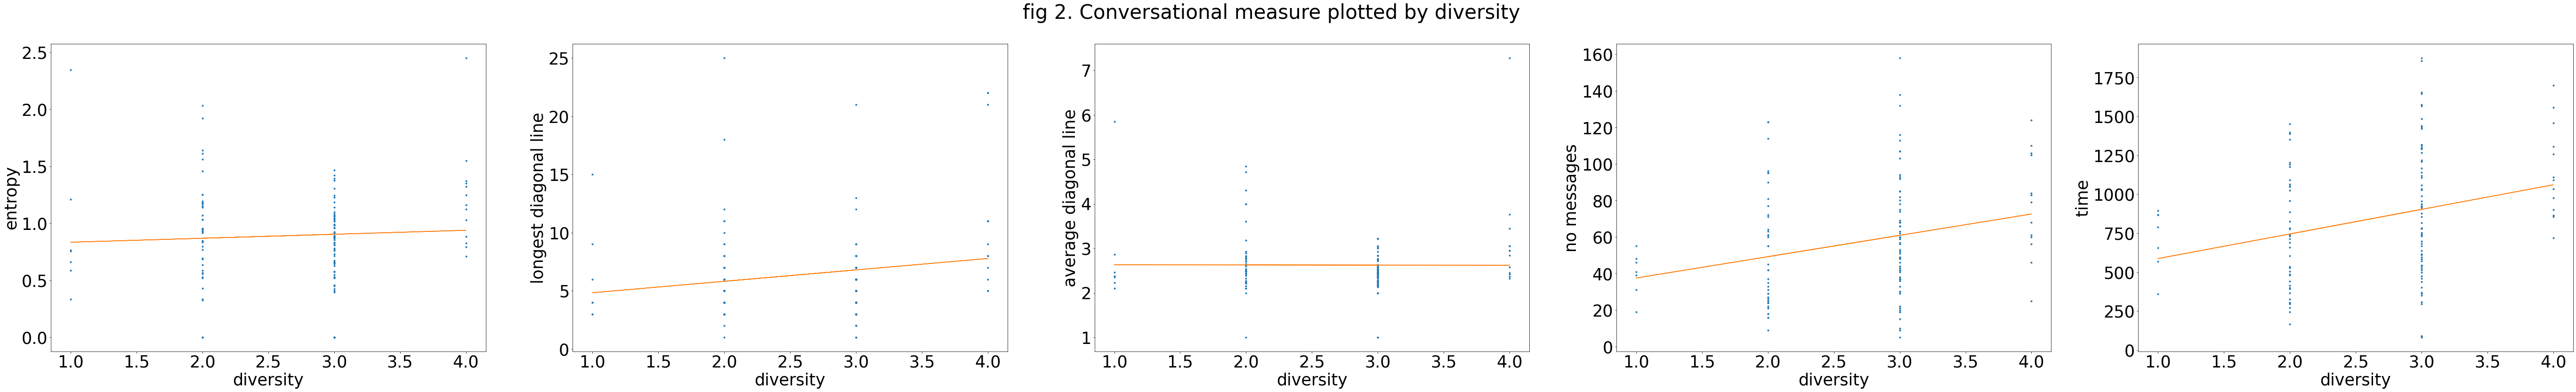

In [13]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

mes = ['entropy', 'longest_diagonal_line', 'average_diagonal_line', 'no_messages', 'time']
# plt.plot(figsize = (40, 400))
fig, (axes) = plt.subplots(1, 5, figsize = (96,12))
plt.rcParams['font.size'] = '35'

for i in range(5):    
    # Sample data
    x = data.diversity
    y = data[mes[i]]
    
    # Fit with polyfit
    
    fig.suptitle('fig 2. Conversational measure plotted by diversity')
#     ax1.plot(x, y)
#     ax2.plot(x, -y)
    b, m = polyfit(x, y, 1)
    axes[i].plot(x, y, '.')
    axes[i].plot(x, b + m * x, '-')
#     plt.xlabel('diversity')
#     plt.ylabel(i)
    axes[i].set(xlabel='diversity', ylabel=mes[i].replace("_", " "))
plt.show()

In [38]:
data.groupby('diversity')['longest_diagonal_line'].max()

diversity
1    15
2    25
3    21
4    22
Name: longest_diagonal_line, dtype: int64

NameError: name 'data' is not defined

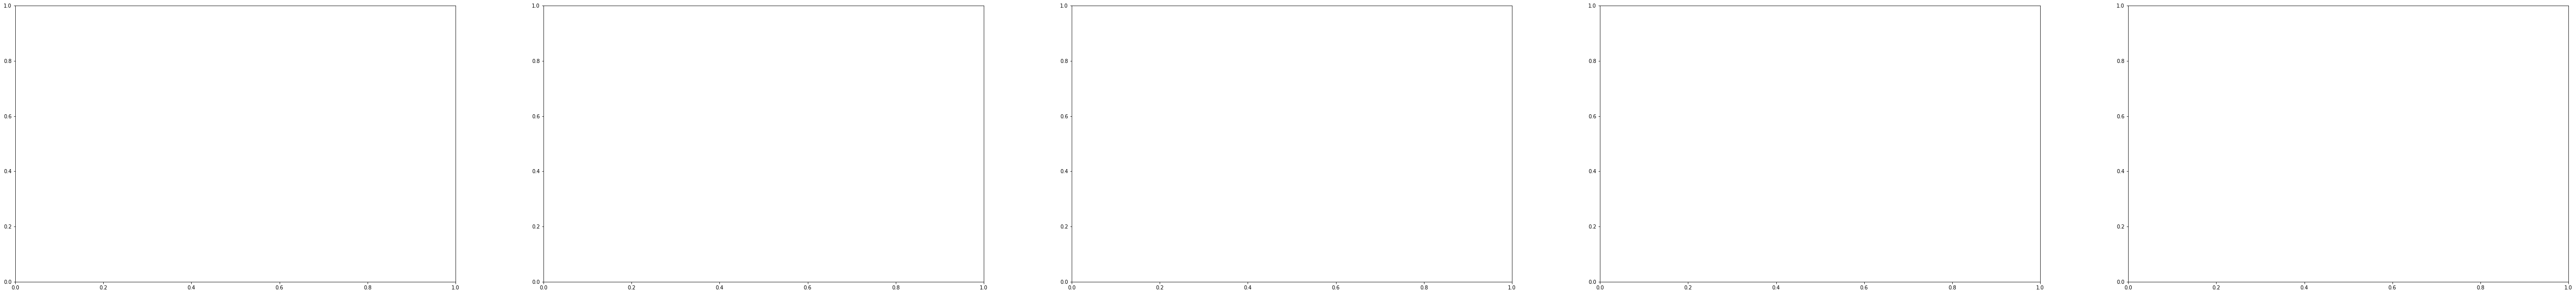

In [1]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

mes = ['entropy', 'longest_diagonal_line', 'average_diagonal_line', 'no_messages', 'time']
# plt.plot(figsize = (40, 400))
fig, (axes) = plt.subplots(1, 5, figsize = (90,10))
plt.rcParams['font.size'] = '42'

for i in range(5):    
    # Sample data
    x = data.diversity
    y = data[mes[i]]
    
    # Fit with polyfit
    
    #fig.suptitle('fig 2. Conversational measure plotted by diversity')
#     ax1.plot(x, y)
#     ax2.plot(x, -y)
    b, m = polyfit(x, y, 1)
    axes[i].plot(x, y, '.')
    axes[i].plot(x, b + m * x, '-')
#     plt.xlabel('diversity')
#     plt.ylabel(i)
    axes[i].set(xlabel='diversity', ylabel=mes[i].replace("_", " "))
plt.savefig('./plots/graphs.png')
plt.show()

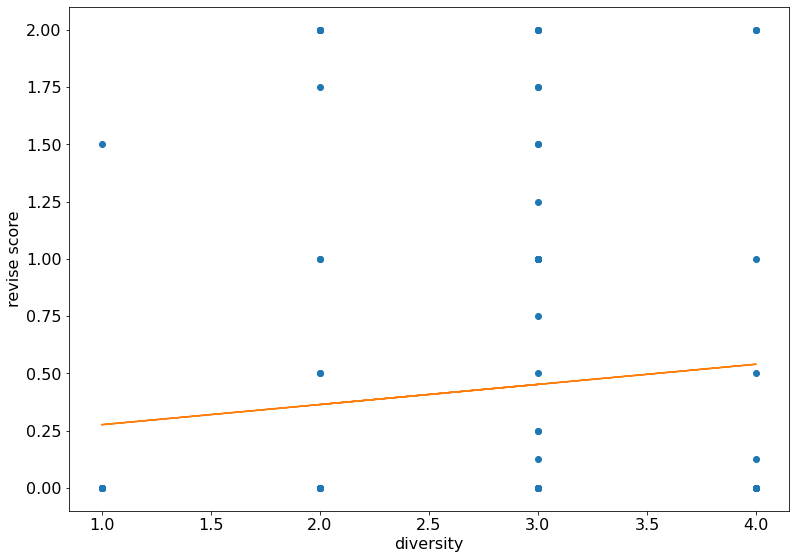

In [10]:
for i in ['revise_score']:
    plt.rcParams['font.size'] = '16'
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_axes([0,0,1,1])

    x = data.diversity
    y = data[i]

    plt.plot(x, y, 'o')

    m, b = np.polyfit(x, y, 1)

    plt.plot(x, m*x + b)
    plt.xlabel('diversity')
    plt.ylabel(i.replace("_", " "))

(0.0, 5.0)

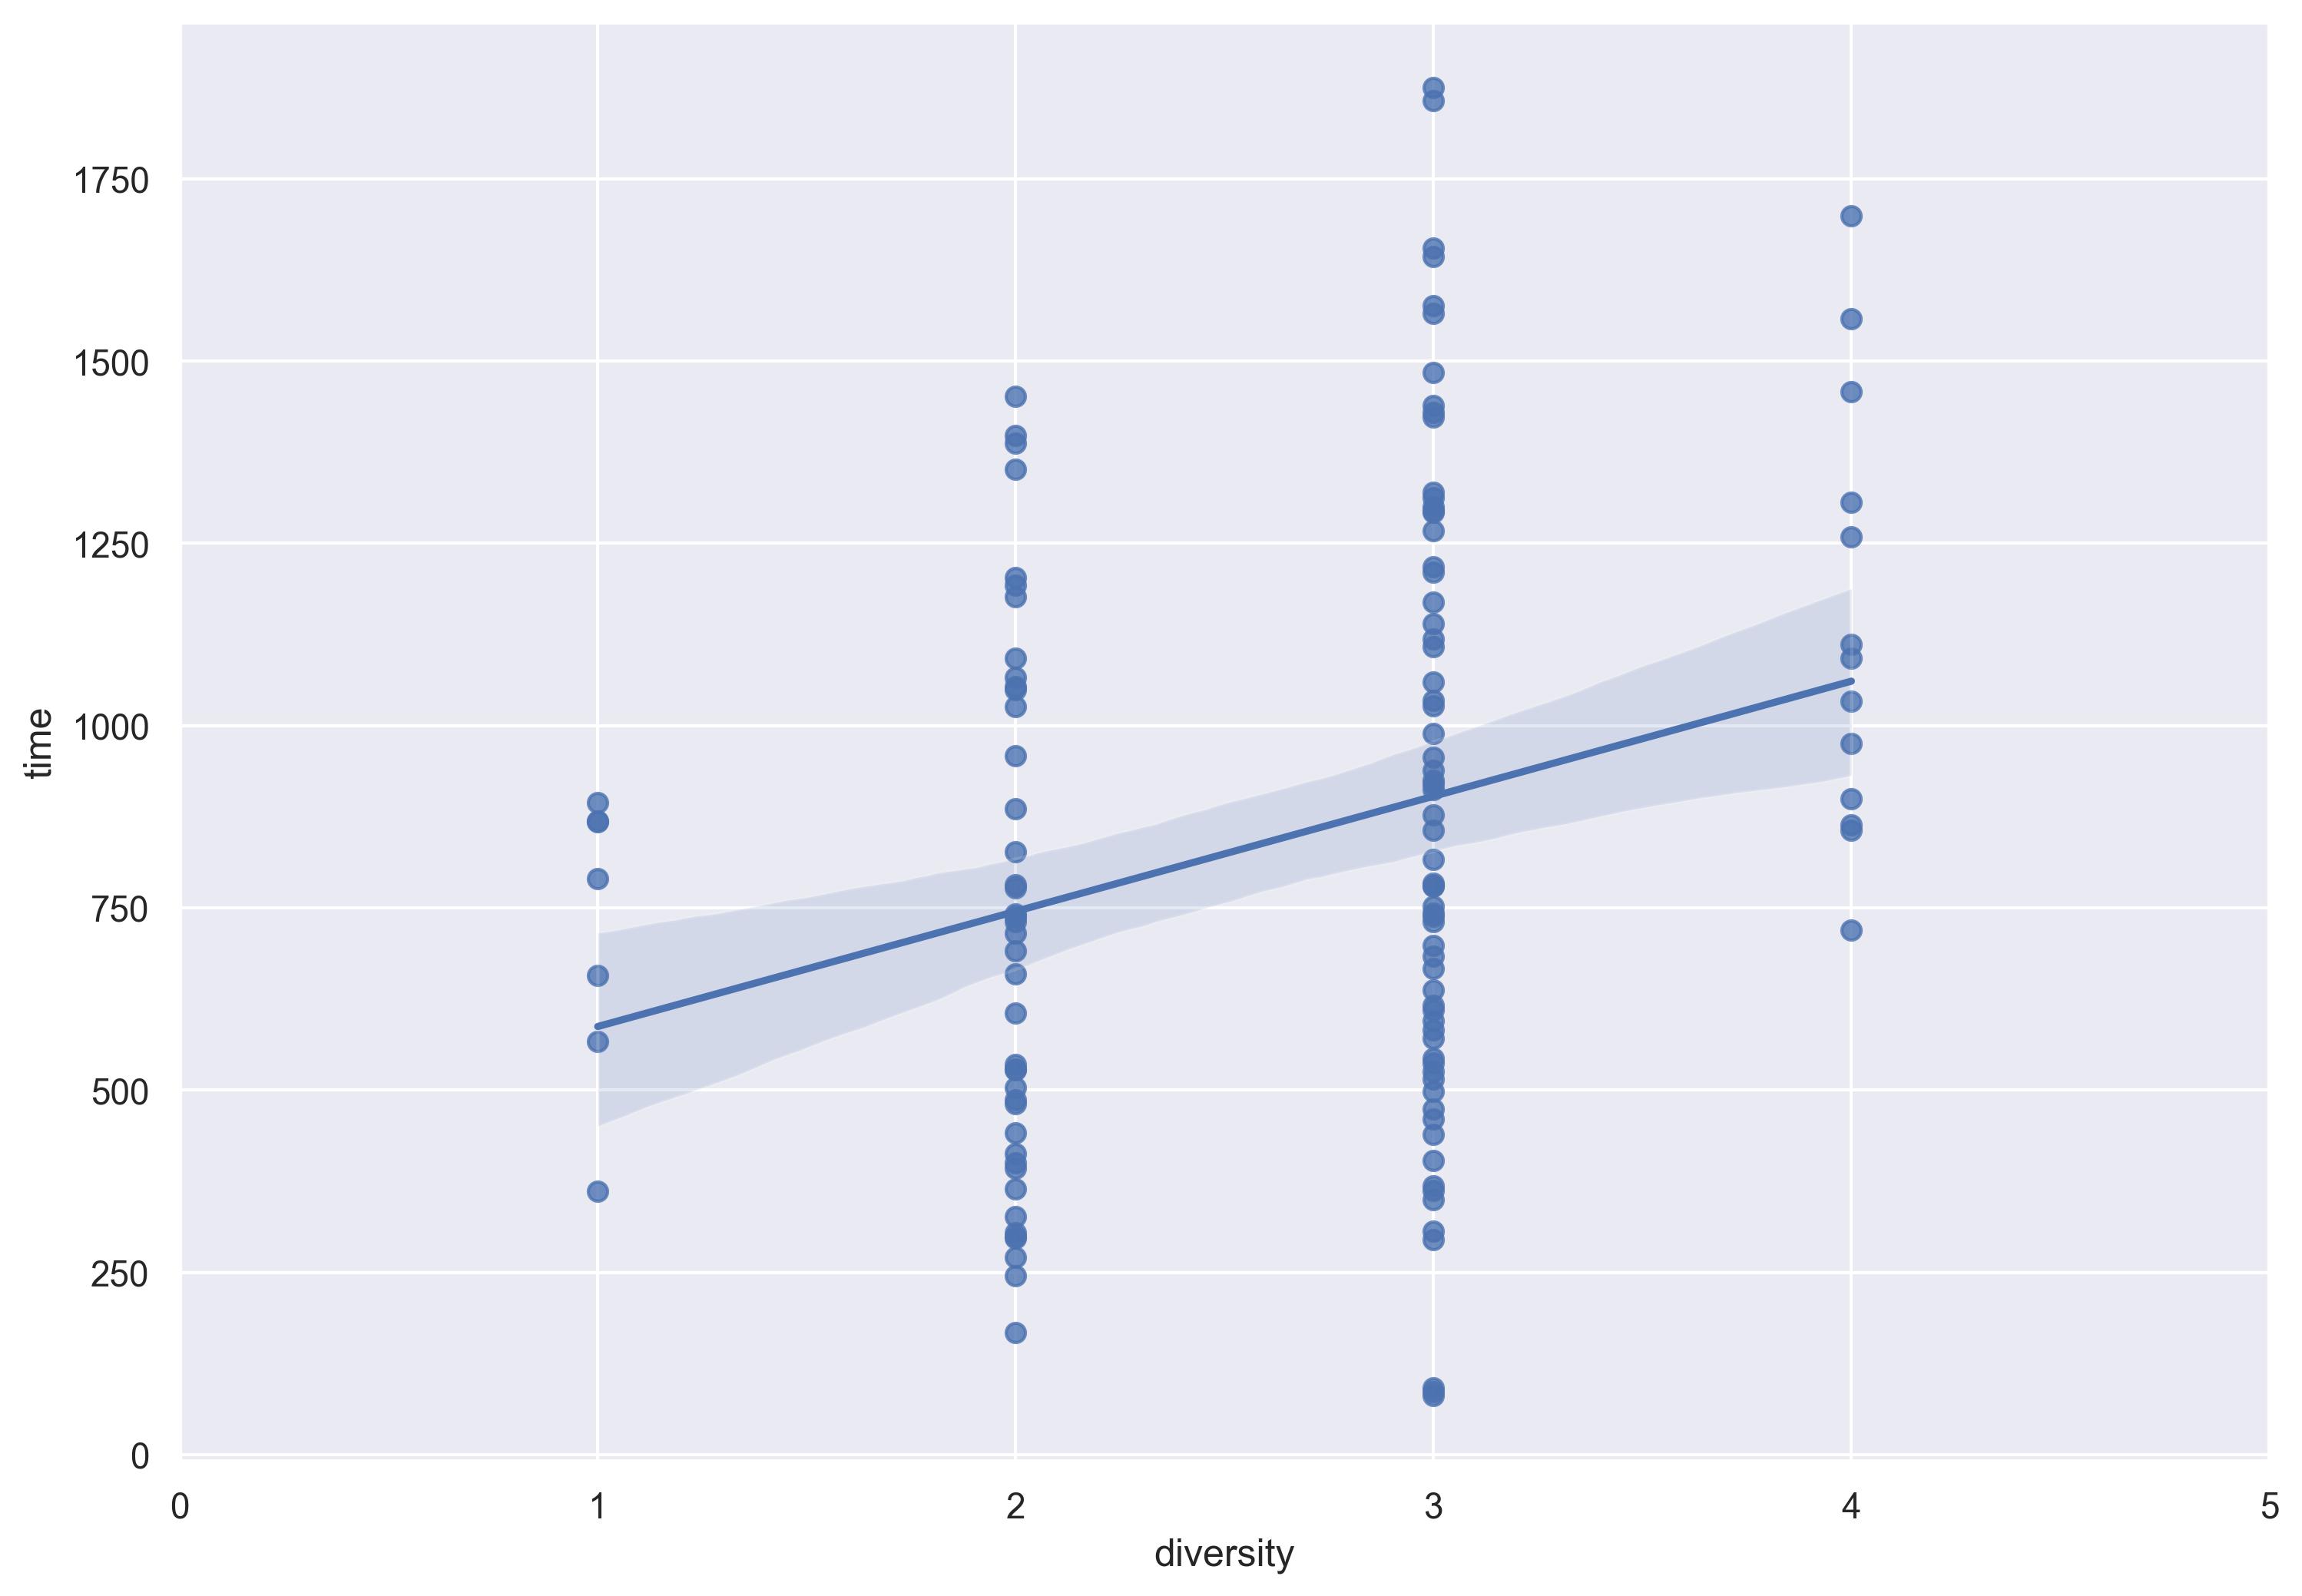

In [59]:
import seaborn as sns; sns.set_theme(color_codes=True)
ax = sns.regplot(x=x, y=y)
ax.set_xlim((0,5))

(0.0, 5.0)

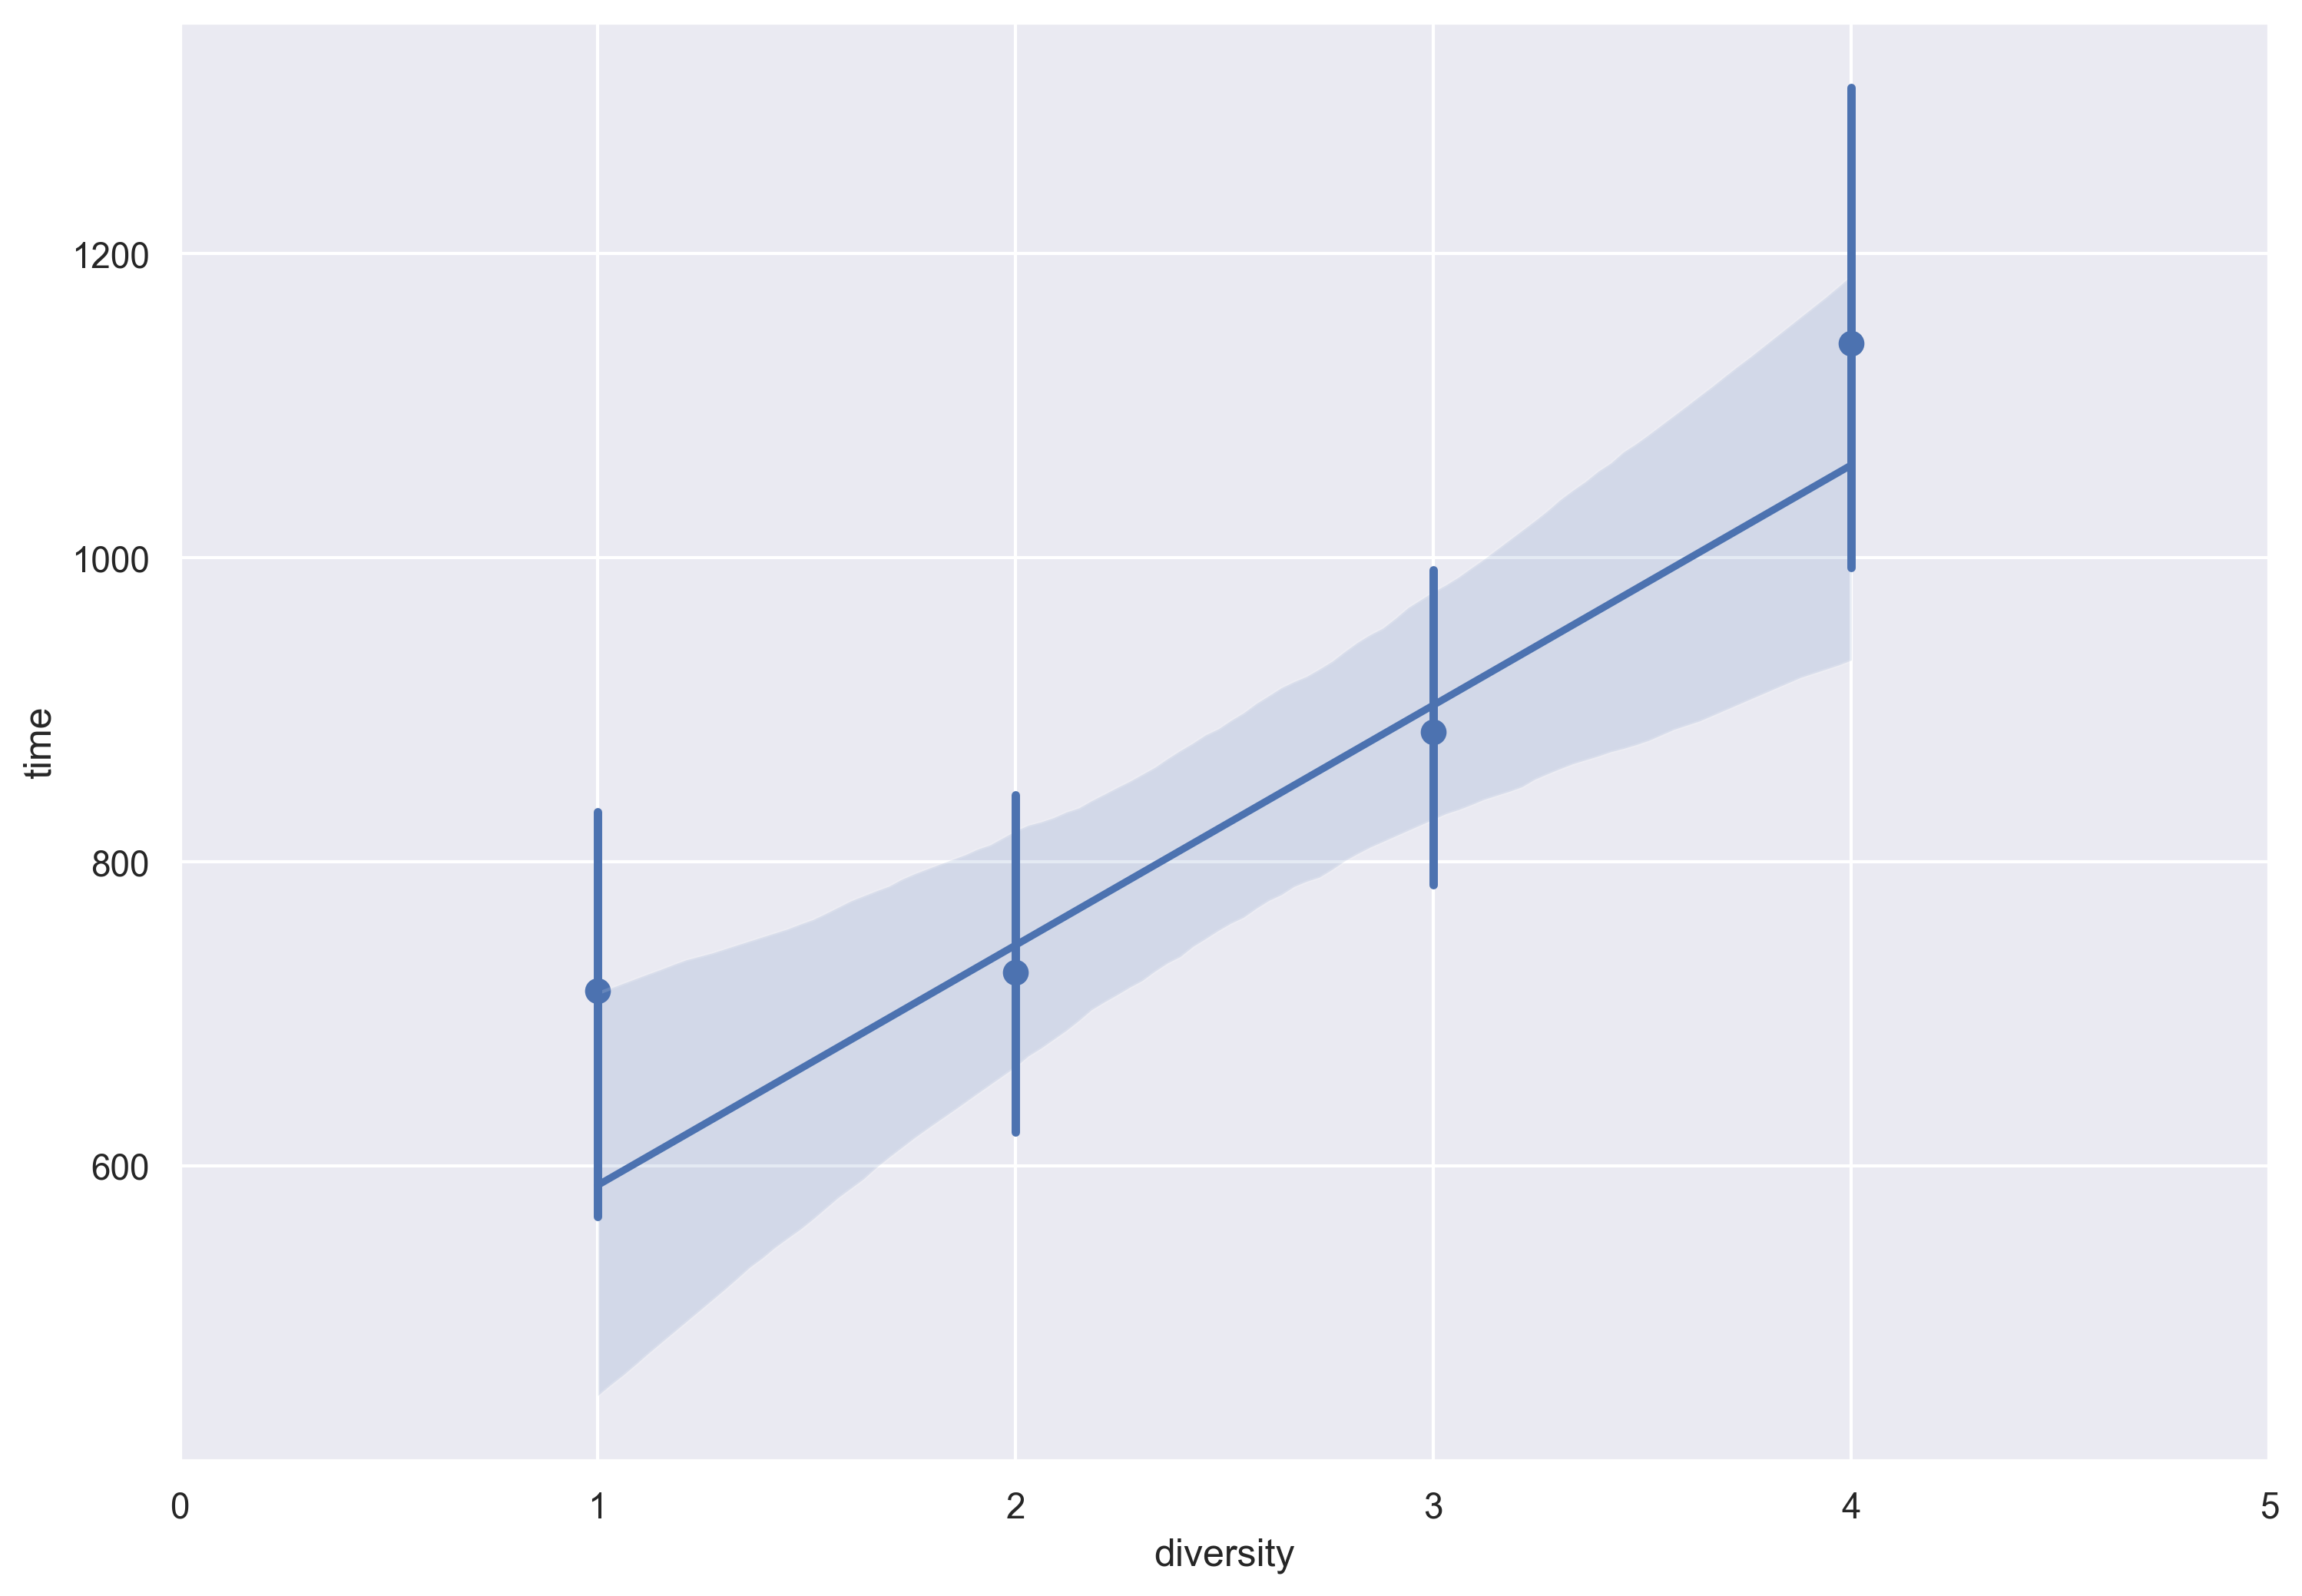

In [58]:
# fig = plt.figure(figsize=(5, 3.25))
# ax = fig.add_axes([0,0,1,1])
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

ax = sns.regplot(x=x, y=y,
                 x_estimator=np.mean)
ax.set_xlim((0,5))